In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from itertools import product

Загрузите датасет в pandas DataFrame под названием df.

In [4]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Описание неполностью заполненных полей датафрейма 
#  
#### 3   LotFrontage    1201 non-null   float64 погонные футы улицы, соединенной с участком. 
#### 6   Alley          91 non-null     object Тип подъезда к дороге 
#### 25  MasVnrType     588 non-null    object тип каменной облицовки. 
#### 26  MasVnrArea     1452 non-null   float64 площадь каменного шпона в квадратных футах. 
#### 30  BsmtQual       1423 non-null   object Высота подвала. 
#### 31  BsmtCond       1423 non-null   object Общее состояние подвала 
#### 32  BsmtExposure   1422 non-null   object стены подвала на уровне сада или выходного этажа. 
#### 33  BsmtFinType1   1423 non-null   object Качество готовой площади подвала. 
#### 35  BsmtFinType2   1422 non-null   object качество второй готовой площади (если имеется). 
#### 57  FireplaceQu    770 non-null    object Качество камина 
#### 58  GarageType     1379 non-null   object Расположение гаража 
#### 59  GarageYrBlt    1379 non-null   float64 Год постройки гаража. 
#### 60  GarageFinish   1379 non-null   object Внутренняя отделка гаража. 
#### 63  GarageQual     1379 non-null   object Внутренняя отделка гаража. 
#### 64  GarageCond     1379 non-null   object состояние гаража 
#### 72  PoolQC         7 non-null      object качество бассейна 
#### 73  Fence          281 non-null    object Качество забора 
#### 74  MiscFeature    54 non-null     object Разные функции, не вошедшие в другие 

In [8]:
### Выбор столбцов для удаления
columns_to_remove = ['Alley', 'MasVnrType', 'BsmtExposure', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

df = df.drop(columns=columns_to_remove)

In [9]:
### Выбор столбцов для заполнения пропущенных значений средними значениями

columns_to_mean = ['LotFrontage', 'MasVnrArea']

for column in columns_to_mean:
    mean_rating = df[column].mean()
    print(mean_rating)
    df[column] = df[column].fillna(mean_rating)

70.04995836802665
103.68526170798899


In [10]:
### Выбор столбцов для заполнения пропущенных значений самыми частыми значениями (модами)

columns_to_mode = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

for column in columns_to_mode:
    mode_rating = df[column].mode()
    df[column] = df[column].fillna(mode_rating[0])

In [11]:
### проверка полученных результатов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Проверка на дубликаты

In [7]:
duplicates = df.duplicated()
print("Дублирующиеся строки:")
print(df[duplicates])

Дублирующиеся строки:
Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 ro

Вывод: в датасете дублирующих строк нет

In [12]:
df[df['Id'].duplicated()]
### Вывод: Id записей также не дублируются

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [13]:
df.describe().round(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,...,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,22.0,9981.3,1.4,1.1,30.2,20.6,180.6,456.1,...,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,60.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,70.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,79.0,11601.5,7.0,6.0,2000.0,2004.0,164.2,712.2,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [14]:
# Проверка всех вариантов значений в объектных столбцах датафрейма
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].unique()
        print(f"Уникальные значения в столбце '{col}': {unique_values}")

### Вывод: нет оснований переводить объектные типы в числовые, т.к. все значения объектных типов - строки.

Уникальные значения в столбце 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Уникальные значения в столбце 'Street': ['Pave' 'Grvl']
Уникальные значения в столбце 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Уникальные значения в столбце 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Уникальные значения в столбце 'Utilities': ['AllPub' 'NoSeWa']
Уникальные значения в столбце 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Уникальные значения в столбце 'LandSlope': ['Gtl' 'Mod' 'Sev']
Уникальные значения в столбце 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Уникальные значения в столбце 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Уникальные значения в столбце 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Уникальные 

4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:
a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?

In [15]:
### Описательная статистика переменной 'SalePrice'

df['SalePrice'].describe().round(2)

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

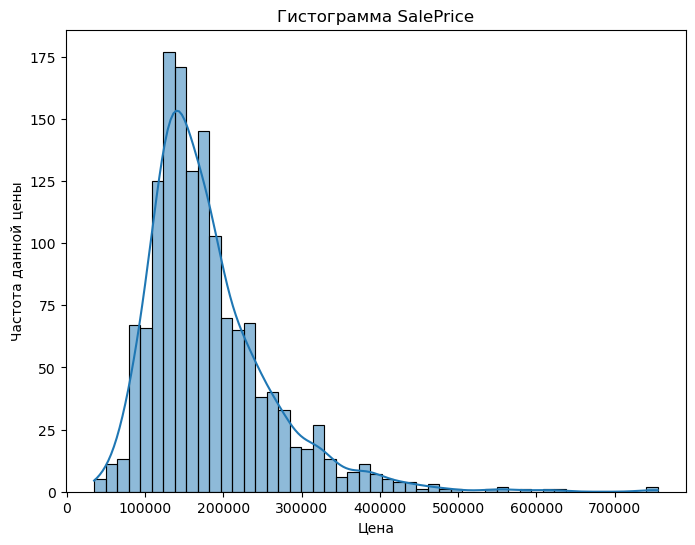

In [16]:
# Отрисовка гистограммы распределения переменной 'SalePrice'
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Гистограмма SalePrice')
plt.xlabel('Цена')
plt.ylabel('Частота данной цены')
plt.show()

#### Вывод: распределение ненормальное, внешний вид соответствует, вероятнее всего, лог-нормальное 

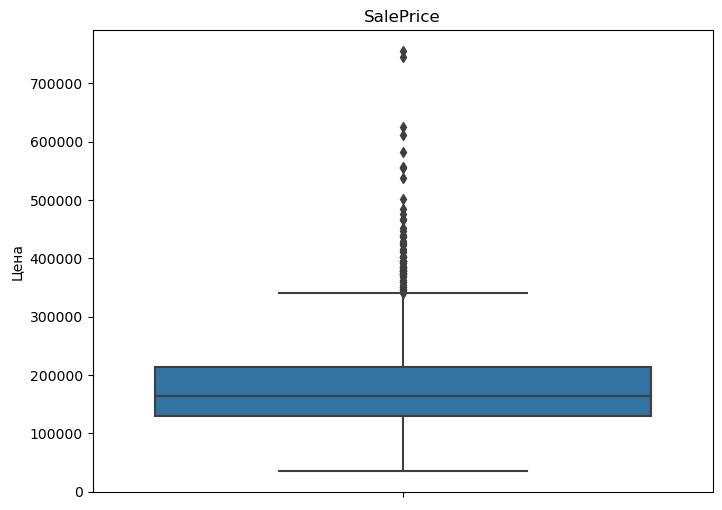

In [17]:
# Отрисовка графика "Ящик с усами"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='SalePrice')
plt.title('SalePrice')
plt.ylabel('Цена')
plt.show()

### Вывод: выбросы в переменной SalePrice есть в большом количестве

C:\Users\user\AppData\Local\Temp\ipykernel_22196\3924721835.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SalePrice'], shade=True)


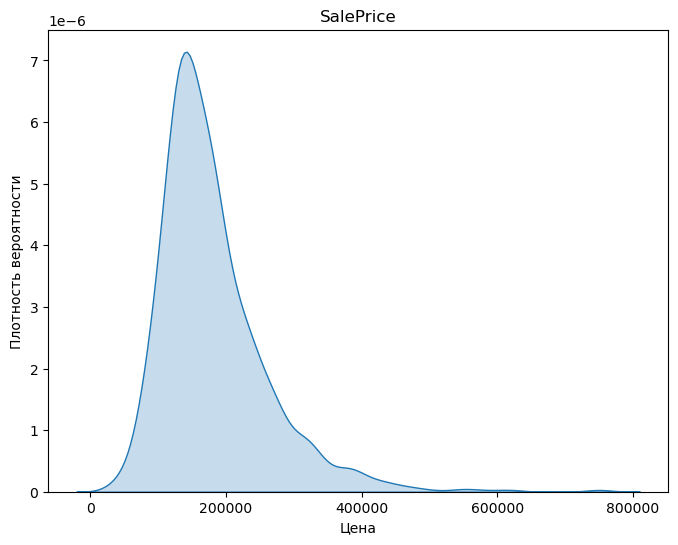

In [18]:
# График плотности вероятности
plt.figure(figsize=(8, 6))
sns.kdeplot(df['SalePrice'], shade=True)
plt.title('SalePrice')
plt.xlabel('Цена')
plt.ylabel('Плотность вероятности')
plt.show()

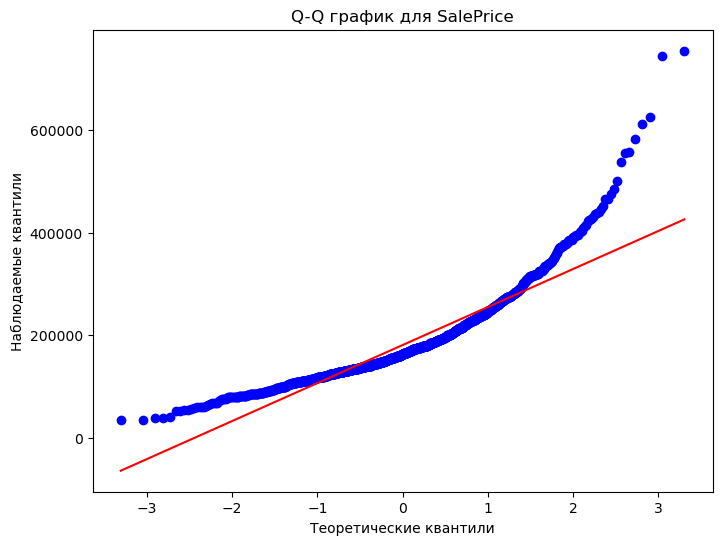

In [19]:
# Отрисовка графика "Квантиль-Квантиль" 
plt.figure(figsize=(8, 6))
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q график для SalePrice')
plt.xlabel('Теоретические квантили')
plt.ylabel('Наблюдаемые квантили')
plt.show()

### Вывод: Распределение переменной SalePrice явно ненормальное

In [20]:
# Рассчет Z-статистики для определения выбросов

z_scores = stats.zscore(df['SalePrice'])

# Определение выбросов на основании Z-статистики
outliers_SalePrice = df[(z_scores < -3) | (z_scores > 3)]

# Рассчет межквантильного интервала 
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов на основании межквантильного интервала
outliers_iqr_SalePrice = df[(df['SalePrice'] < Q1 - 1.5 * IQR) | (df['SalePrice'] > Q3 + 1.5 * IQR)]

In [21]:
print("Идентификаторы записей для значений цен-выбросов на основании Z-статистики:")
print(outliers_SalePrice[['Id', 'SalePrice']])

Идентификаторы записей для значений цен-выбросов на основании Z-статистики:
        Id  SalePrice
58      59     438780
178    179     501837
185    186     475000
349    350     437154
389    390     426000
440    441     555000
473    474     440000
496    497     430000
527    528     446261
591    592     451950
664    665     423000
691    692     755000
769    770     538000
798    799     485000
803    804     582933
898    899     611657
1046  1047     556581
1142  1143     424870
1169  1170     625000
1182  1183     745000
1243  1244     465000
1373  1374     466500


In [22]:
print("Идентификаторы записей для значений цен-выбросов на основании межквантильного интервала:")
print(outliers_iqr_SalePrice[['Id', 'SalePrice']])

Идентификаторы записей для значений цен-выбросов на основании межквантильного интервала:
        Id  SalePrice
11      12     345000
53      54     385000
58      59     438780
112    113     383970
151    152     372402
...    ...        ...
1268  1269     381000
1353  1354     410000
1373  1374     466500
1388  1389     377500
1437  1438     394617

[61 rows x 2 columns]


b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?

In [23]:
### Поскольку все переменные на нормальное распределение мы не проверяли, то лучше исользовать для оценки корреляции ранговый коэффициент Спирмена

variable = 'SalePrice'

# Выбор только количественных переменных
quantitative_vars = df.select_dtypes(include=['int64', 'float64'])

# Рассчет коэффициента корреляции Спирмена и p-value
results = {}
for col in quantitative_vars.columns:
    if col != variable:
        spearman_corr, p_value = spearmanr(df[variable], df[col])
        results[col] = {'Spearman_corr': spearman_corr, 'p_value': p_value}

results_df = pd.DataFrame.from_dict(results, orient='index')

print("Коэффициенты корреляции Спирмена и их р-значения с переменной ", variable, ":")
print(results_df)

Коэффициенты корреляции Спирмена и их р-значения с переменной  SalePrice :
               Spearman_corr        p_value
Id                 -0.018546   4.788948e-01
MSSubClass          0.007192   7.836360e-01
LotFrontage         0.390963   1.616631e-54
LotArea             0.456461   4.871581e-76
OverallQual         0.809829   0.000000e+00
OverallCond        -0.129325   7.118552e-07
YearBuilt           0.652682  5.693841e-178
YearRemodAdd        0.571159  3.557233e-127
MasVnrArea          0.422884   2.059129e-64
BsmtFinSF1          0.301871   3.857909e-32
BsmtFinSF2         -0.038806   1.383221e-01
BsmtUnfSF           0.185197   9.886861e-13
TotalBsmtSF         0.602725  4.157300e-145
1stFlrSF            0.575408  1.780246e-129
2ndFlrSF            0.293598   2.040344e-30
LowQualFinSF       -0.067719   9.645078e-03
GrLivArea           0.731310  1.431015e-244
BsmtFullBath        0.225125   3.130150e-18
BsmtHalfBath       -0.012189   6.416775e-01
FullBath            0.635957  2.729574e-166
H

In [24]:
#### выбор переменных с коэффициентом корреляции Спирмена больше 0,7 (высокая корреляция) с p-значением меньше или равным 0,05 (значимые отличия от нуля)

significant_correlations = {col: values for col, values in results.items() if values['Spearman_corr'] > 0.7 and values['p_value'] <= 0.05}

significant_correlations_df = pd.DataFrame.from_dict(significant_correlations, orient='index')

print("Значимые высокие корреляции переменной SalePrice с переменными:")
print(significant_correlations_df)

Значимые высокие корреляции переменной SalePrice с переменными:
             Spearman_corr        p_value
OverallQual       0.809829   0.000000e+00
GrLivArea         0.731310  1.431015e-244


In [26]:
impotant_variables = ['OverallQual', 'GrLivArea', 'GarageCars']
df[impotant_variables].describe().round(2)

,OverallQual,GrLivArea,GarageCars
count,1460.00,1460.00,1460.00
mean,6.10,1515.46,1.77
std,1.38,525.48,0.75
min,1.00,334.00,0.00
25%,5.00,1129.50,1.00
50%,6.00,1464.00,2.00
75%,7.00,1776.75,2.00
max,10.00,5642.00,4.00


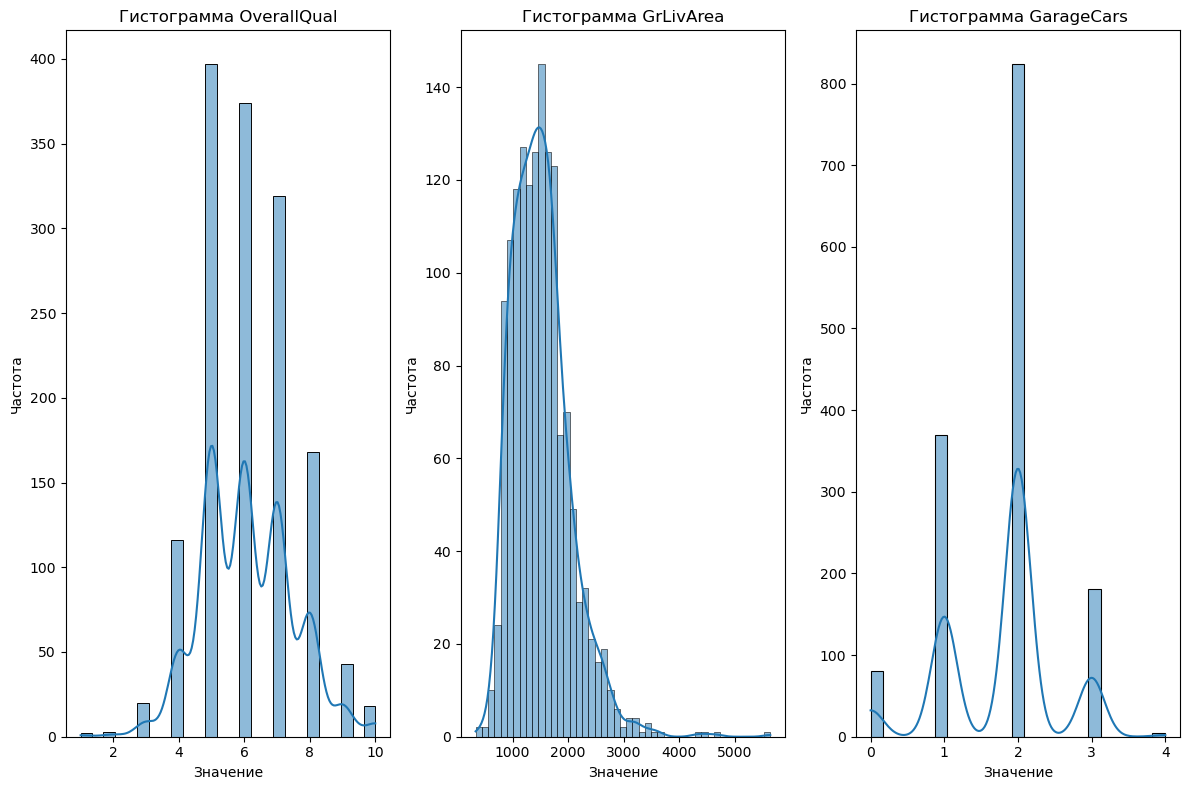

In [27]:
# Отрисовка гистограммы распределения важных переменных
num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(impotant_variables):
    sns.histplot(data=df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

#### Вывод: переменные 'OverallQual' и 'GarageCars' имеют мультимодальное распределение, а переменная 'GrLivArea' лог-нормальное.

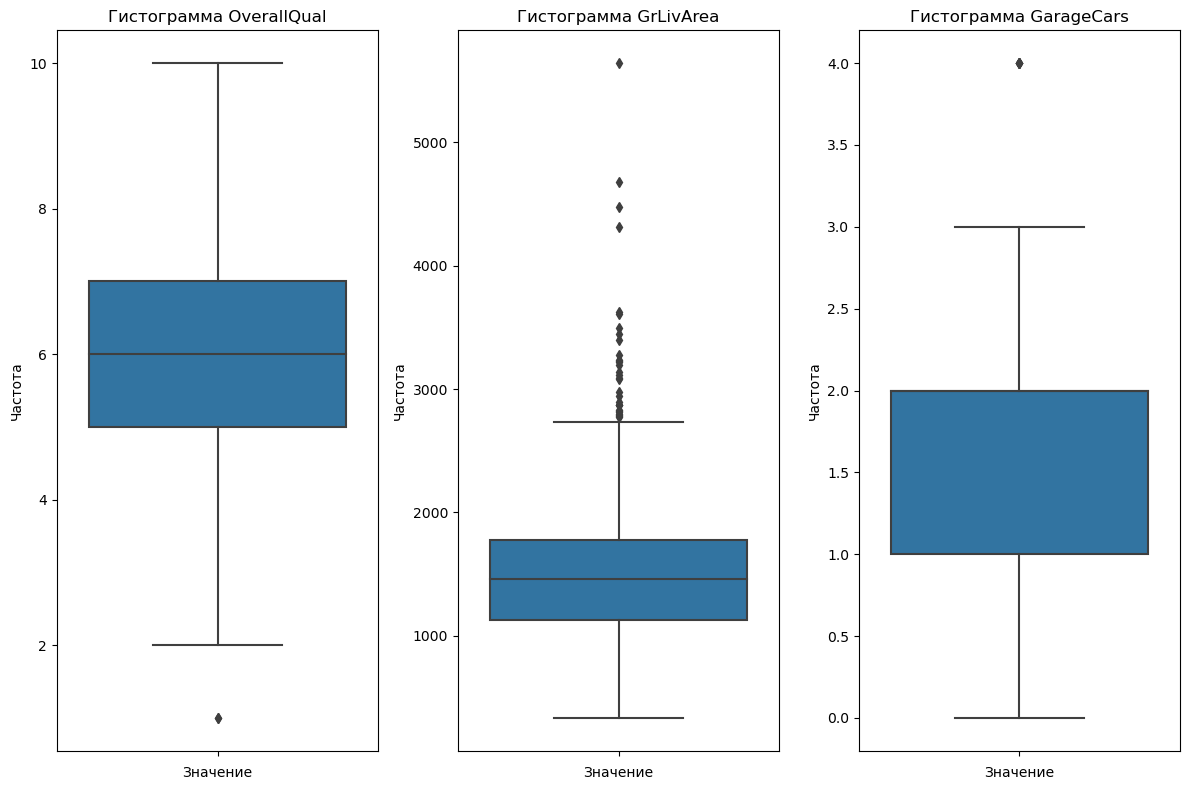

In [28]:
# Отрисовка гистограммы распределения важных переменных
num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(impotant_variables):
    sns.boxplot(data=df, y = col, ax=axes[i])
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

#### Вывод: переменныя 'OverallQual' не имеет выбросов, переменная 'GarageCars' имеют одно сильно отличающиеся значение, а переменная 'GrLivArea' содержит множество выбросов.

In [29]:
##### Вычисление корреляционной матрицы Спирмена и матрицы p-значений

spearman_corr = df[impotant_variables].corr(method='spearman')
spearman_pval = pd.DataFrame(np.zeros_like(spearman_corr.values), columns=spearman_corr.columns, index=spearman_corr.index)

for col in impotant_variables:
    for col2 in df.columns:
        if col != col2:
            corr, pval = spearmanr(df[col], df[col2])
            spearman_corr.loc[col, col2] = corr
            spearman_pval.loc[col, col2] = pval


print("Spearman Correlation Matrix:")
print(spearman_corr)
print("\n")
print("Spearman p-value Matrix:")
print(spearman_pval)

Spearman Correlation Matrix:
             OverallQual  GrLivArea  GarageCars        Id  MSSubClass  \
OverallQual     1.000000   0.603262    0.608756 -0.028771    0.108065   
GrLivArea       0.603262   1.000000    0.505094  0.002812    0.203576   
GarageCars      0.608756   0.505094    1.000000  0.013301    0.024226   

             MSZoning  LotFrontage   LotArea    Street  LotShape  ...  \
OverallQual -0.211704     0.244943  0.233303  0.059456 -0.198547  ...   
GrLivArea   -0.155742     0.342936  0.449040  0.048735 -0.182874  ...   
GarageCars  -0.209286     0.336004  0.340195 -0.027671 -0.195812  ...   

             EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
OverallQual      -0.162434   0.032903     0.046335  0.056667 -0.088019   
GrLivArea        -0.049057   0.033912     0.085630  0.068298 -0.048969   
GarageCars       -0.211429   0.035538     0.025837  0.021783 -0.057536   

               MoSold    YrSold  SaleType  SaleCondition  SalePrice  
OverallQual  0.061

In [30]:
print("Корреляционая матрица важных переменных с другими переменными:")
print(spearman_corr)

Корреляционая матрица важных переменных с другими переменными:
             OverallQual  GrLivArea  GarageCars        Id  MSSubClass  \
OverallQual     1.000000   0.603262    0.608756 -0.028771    0.108065   
GrLivArea       0.603262   1.000000    0.505094  0.002812    0.203576   
GarageCars      0.608756   0.505094    1.000000  0.013301    0.024226   

             MSZoning  LotFrontage   LotArea    Street  LotShape  ...  \
OverallQual -0.211704     0.244943  0.233303  0.059456 -0.198547  ...   
GrLivArea   -0.155742     0.342936  0.449040  0.048735 -0.182874  ...   
GarageCars  -0.209286     0.336004  0.340195 -0.027671 -0.195812  ...   

             EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
OverallQual      -0.162434   0.032903     0.046335  0.056667 -0.088019   
GrLivArea        -0.049057   0.033912     0.085630  0.068298 -0.048969   
GarageCars       -0.211429   0.035538     0.025837  0.021783 -0.057536   

               MoSold    YrSold  SaleType  SaleConditi

In [31]:
print("Матрица p-значений важных переменных с другими переменными:")
print(spearman_pval)

Матрица p-значений важных переменных с другими переменными:
               OverallQual      GrLivArea     GarageCars        Id  \
OverallQual   0.000000e+00  1.978322e-145  9.140759e-149  0.271933   
GrLivArea    1.978322e-145   0.000000e+00   2.325719e-95  0.914493   
GarageCars   9.140759e-149   2.325719e-95   0.000000e+00  0.611590   

               MSSubClass      MSZoning   LotFrontage       LotArea    Street  \
OverallQual  3.507188e-05  2.956433e-16  2.175750e-21  1.688853e-19  0.023094   
GrLivArea    4.018005e-15  2.199403e-09  1.481917e-41  2.348725e-73  0.062648   
GarageCars   3.549543e-01  6.498779e-16  7.306351e-40  7.004682e-41  0.290700   

                 LotShape  ...  EnclosedPorch  3SsnPorch  ScreenPorch  \
OverallQual  1.913661e-14  ...   4.298646e-10   0.208944     0.076745   
GrLivArea    1.907356e-12  ...   6.093236e-02   0.195307     0.001056   
GarageCars   4.394707e-14  ...   3.234319e-16   0.174723     0.323855   

             PoolArea   MiscVal    MoSold

In [32]:
#### выбор переменных с коэффициентом корреляции Спирмена больше 0,7 (высокая корреляция) с p-значением меньше или равным 0,05 (значимые отличия от нуля)

high_corr = spearman_corr[(spearman_corr.abs() > 0.7) & (spearman_pval <= 0.05)]

print("Значимые высокие корреляции важных переменных с другими переменными:")
print(high_corr)

#### Вывод: доказана высокая и значимая корреляция важных переменных с ценой недвижимости

Значимые высокие корреляции важных переменных с другими переменными:
             OverallQual  GrLivArea  GarageCars  Id  MSSubClass  MSZoning  \
OverallQual          1.0        NaN         NaN NaN         NaN       NaN   
GrLivArea            NaN        1.0         NaN NaN         NaN       NaN   
GarageCars           NaN        NaN         1.0 NaN         NaN       NaN   

             LotFrontage  LotArea  Street  LotShape  ...  EnclosedPorch  \
OverallQual          NaN      NaN     NaN       NaN  ...            NaN   
GrLivArea            NaN      NaN     NaN       NaN  ...            NaN   
GarageCars           NaN      NaN     NaN       NaN  ...            NaN   

             3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
OverallQual        NaN          NaN       NaN      NaN     NaN     NaN   
GrLivArea          NaN          NaN       NaN      NaN     NaN     NaN   
GarageCars         NaN          NaN       NaN      NaN     NaN     NaN   

             SaleType  S

d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

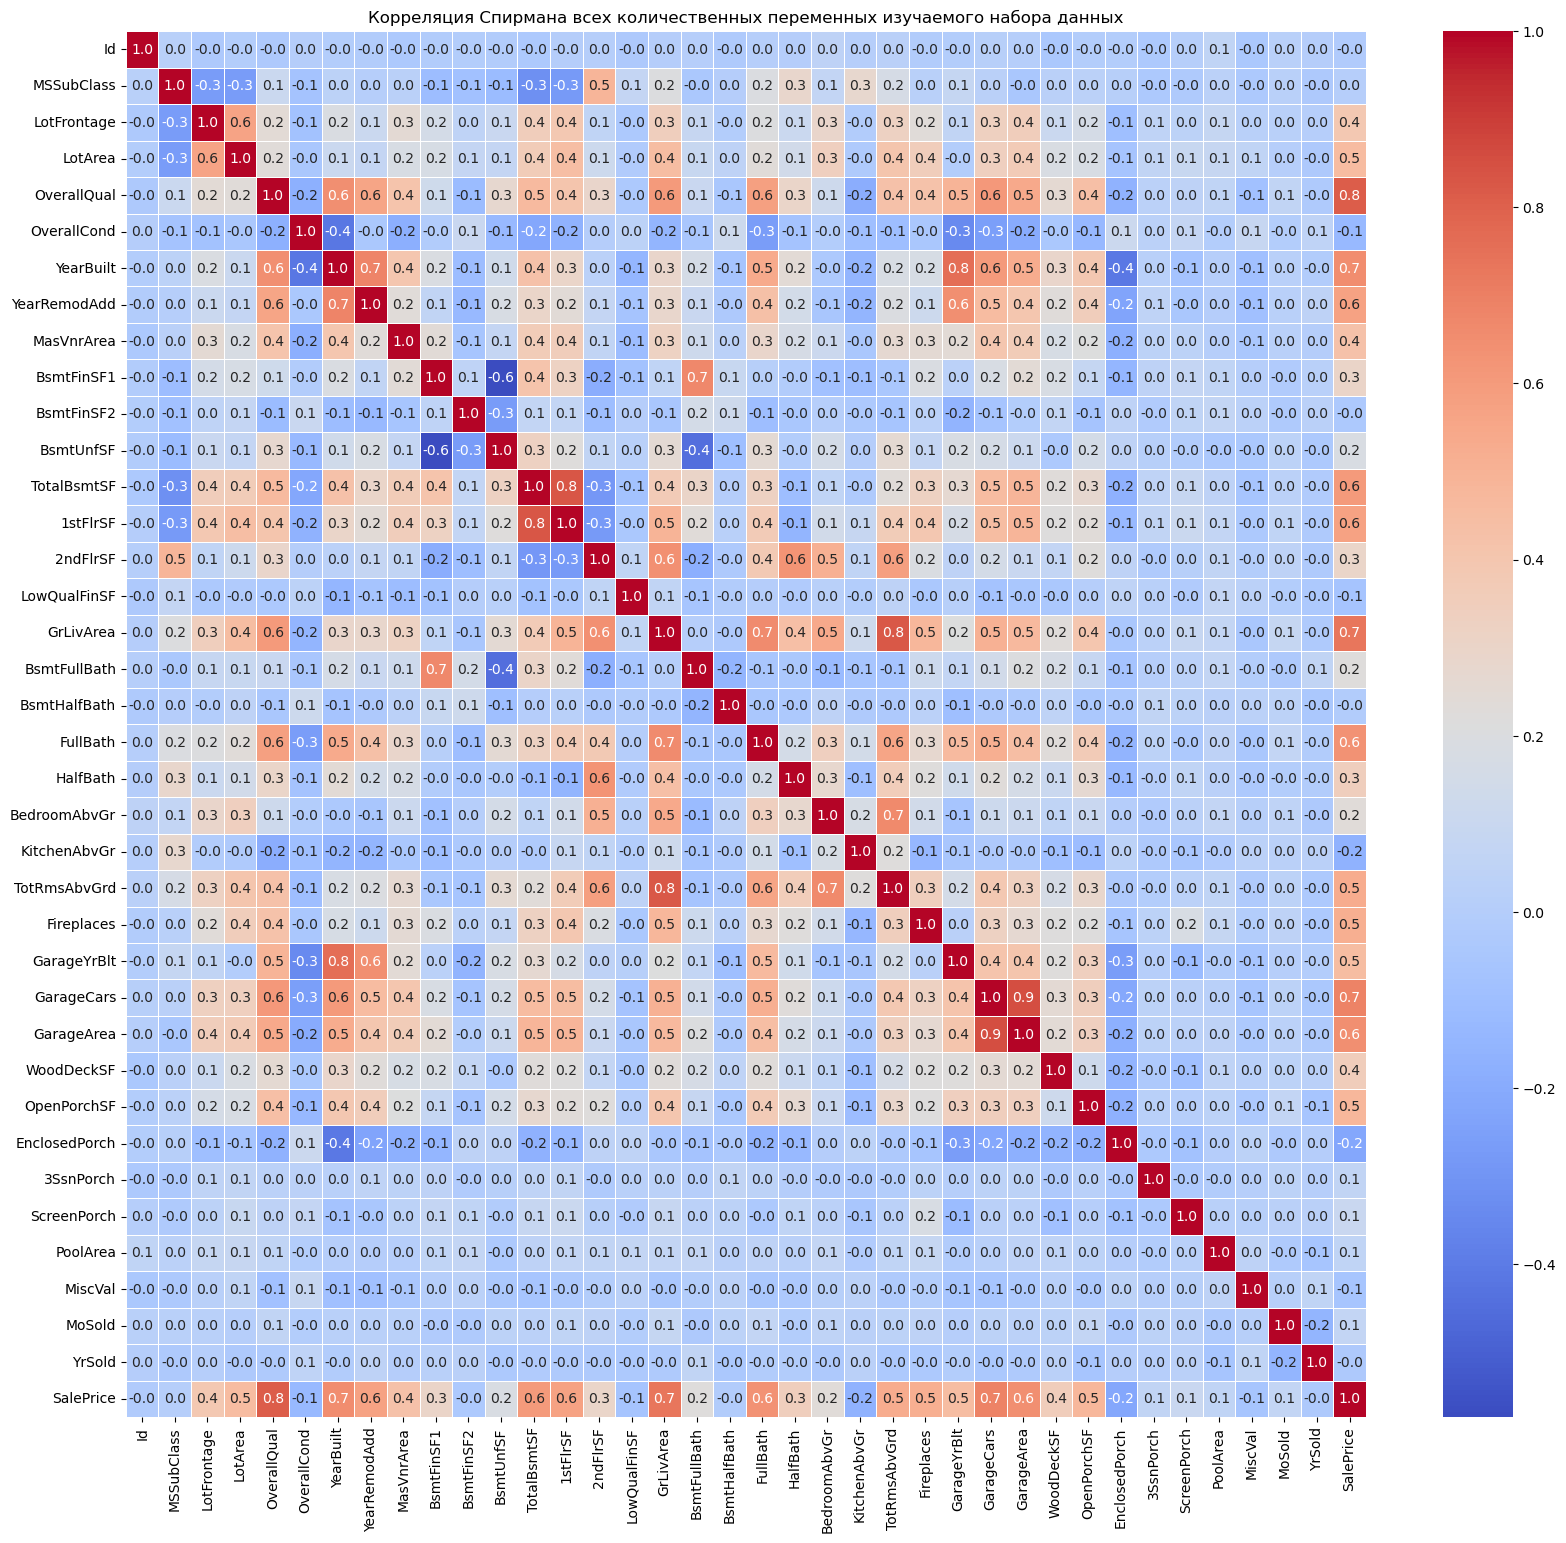

In [33]:
# Calculate Spearman correlation matrix
spearman_corr_matrix = quantitative_vars.corr(method='spearman')

# Plot Spearman correlation heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Корреляция Спирмана всех количественных переменных изучаемого набора данных')
plt.show()

#### Вывод: переменными с наибольшей корреляцией являются: 
# 'OverallQual' (Общее качество материала и отделки),  
# 'YearBuilt' (Первоначальная дата постройки), 
# 'YearRemodAdd' (Дата ремонта), 
# 'TotalBsmtSF' (Общая площадь подвала в квадратных метрах), 
# '2ndFlrSF' (Площадь второго этажа, кв.), 
# 'GrLivArea' (Жилая площадь над уровнем земли (земля), квадратные футы), 
# 'FullBath' (Полноценные ванные комнаты над уровнем моря), 
# 'GarageCars' (Размер гаража по вместимости автомобиля), 
# 'SalePrice' (Цена продажи)

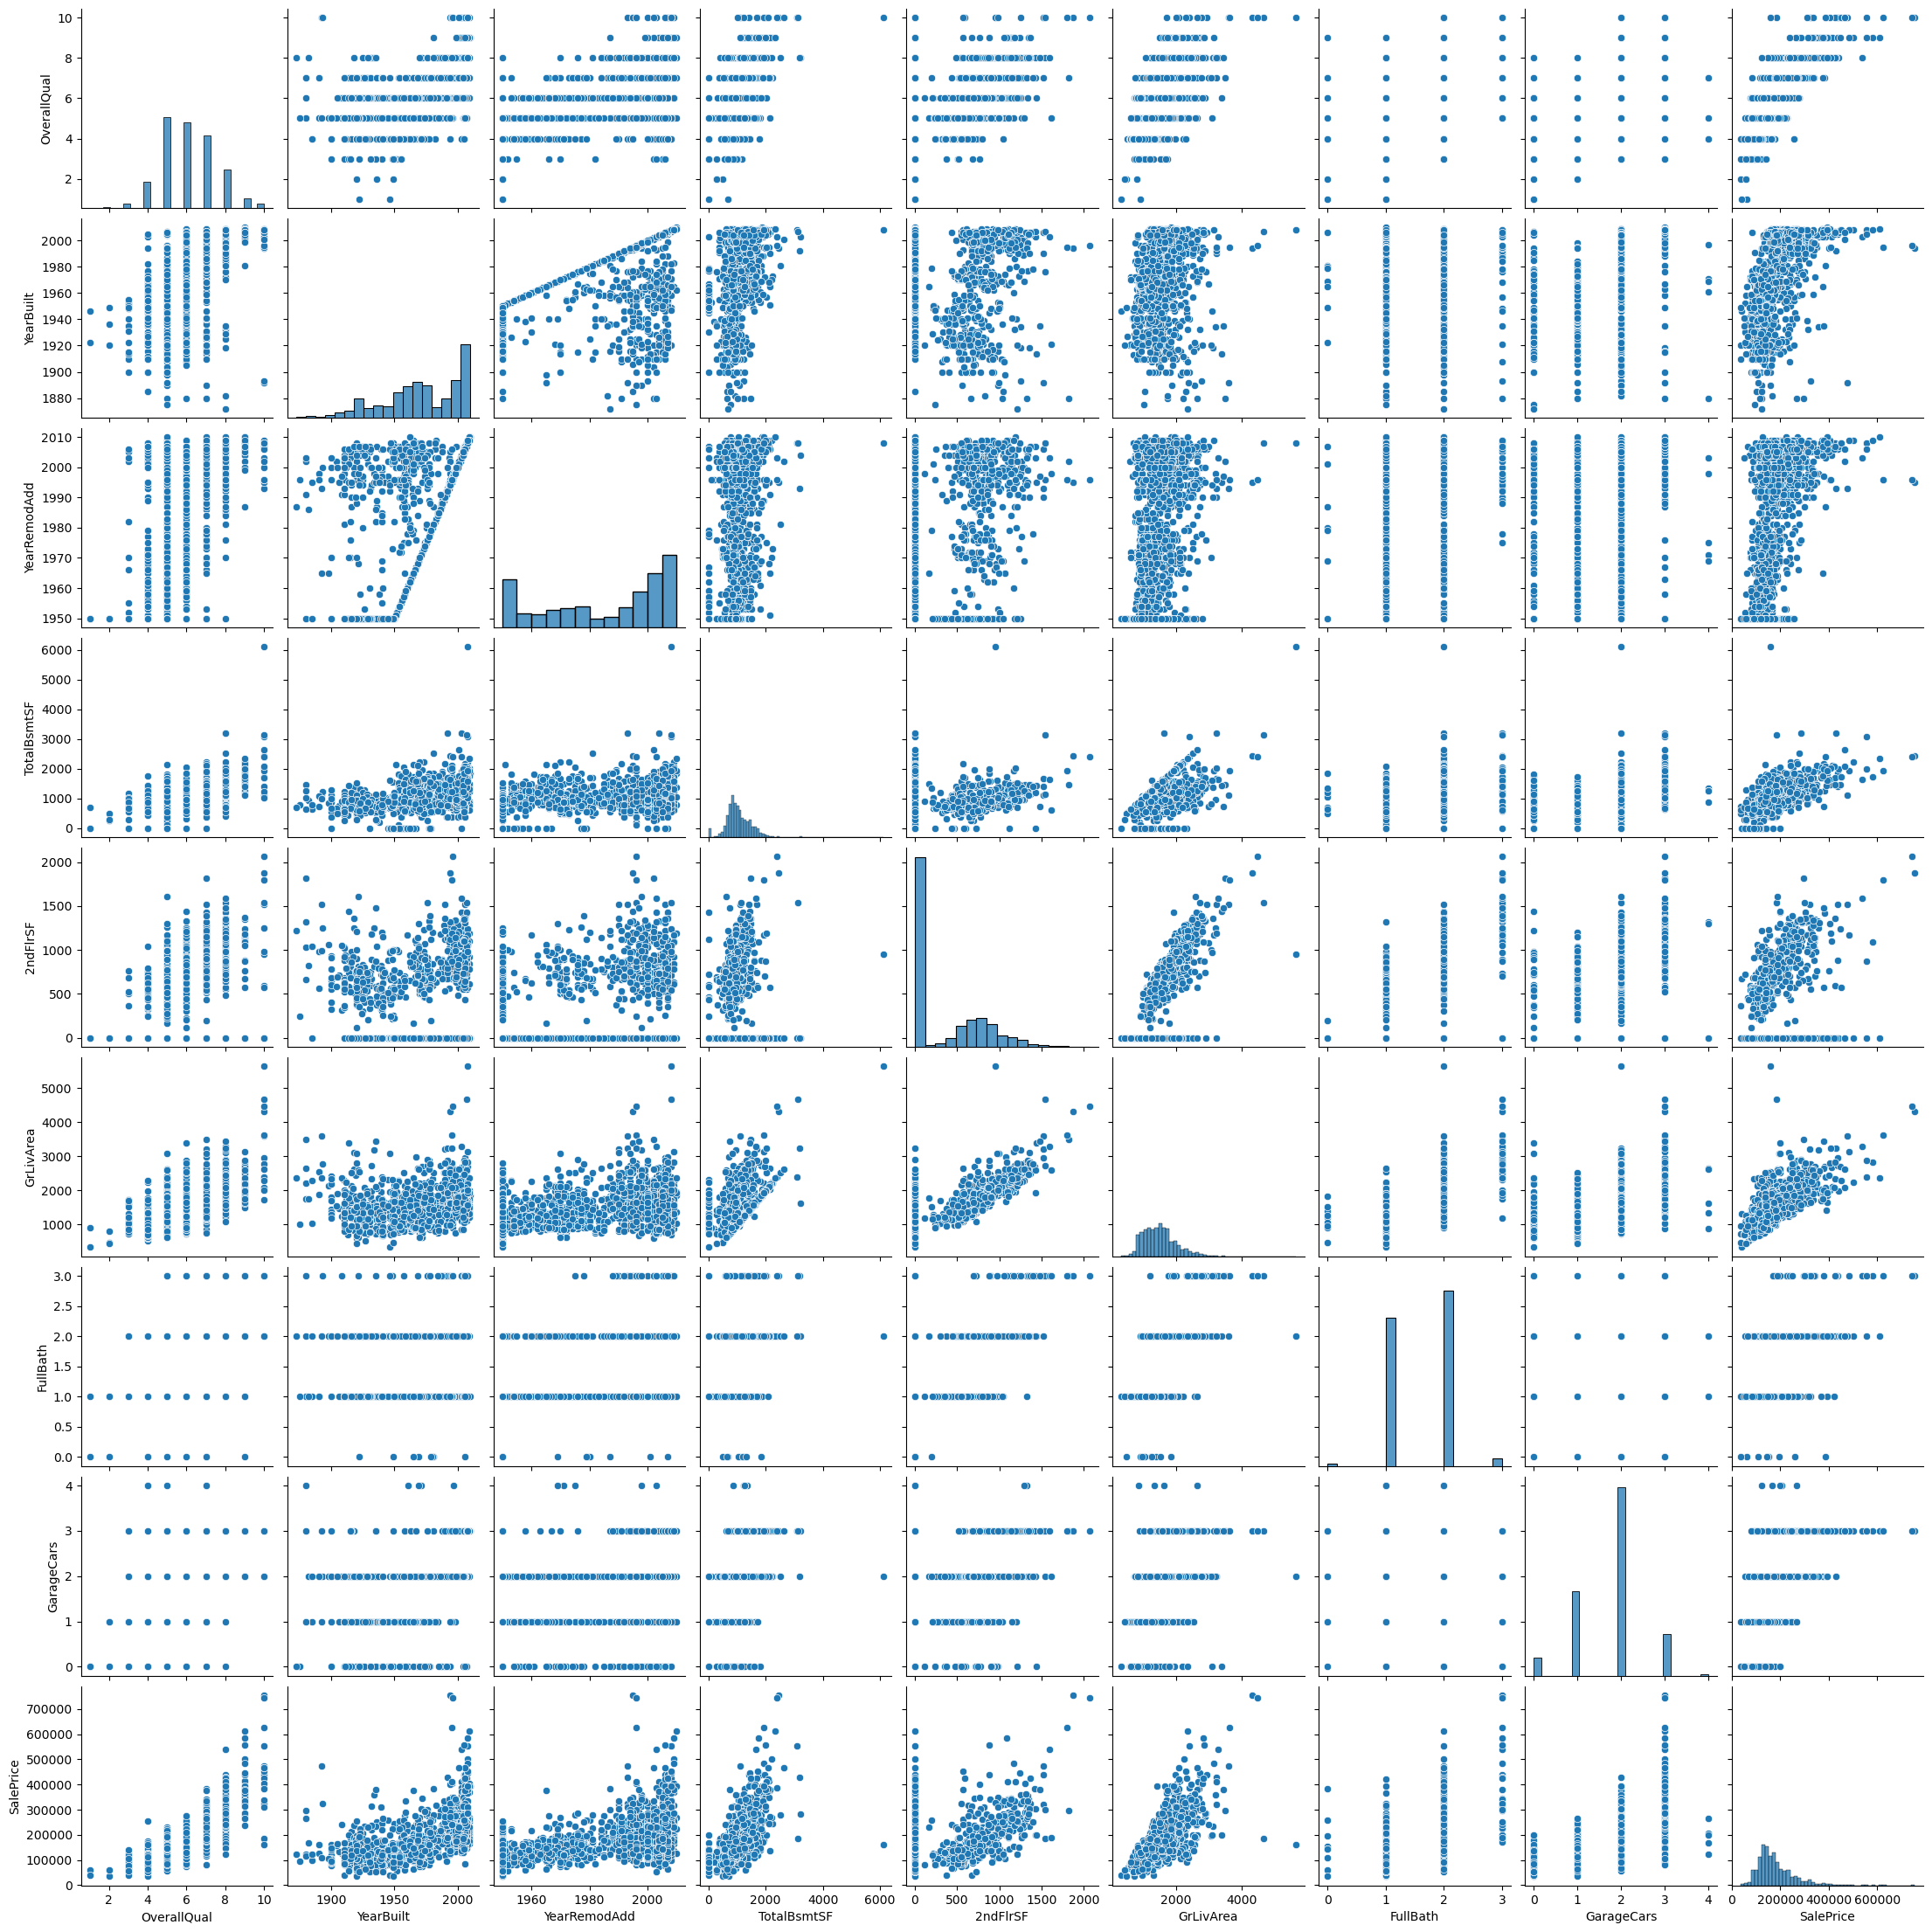

In [34]:
#### Отрисовка матрицы диаграмм рассеивания для наиболее значимых количественных переменных

selected_vars = ['OverallQual',  'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice'] 

# Create a dataframe containing only the selected variables
selected_df = df[selected_vars]

# Use pairplot to create a matrix of scatter plots
sns.pairplot(selected_df)

#### Вывод: Три переменные: 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea' имеют вид взаимосвязи на цену продажи близкий к линейному

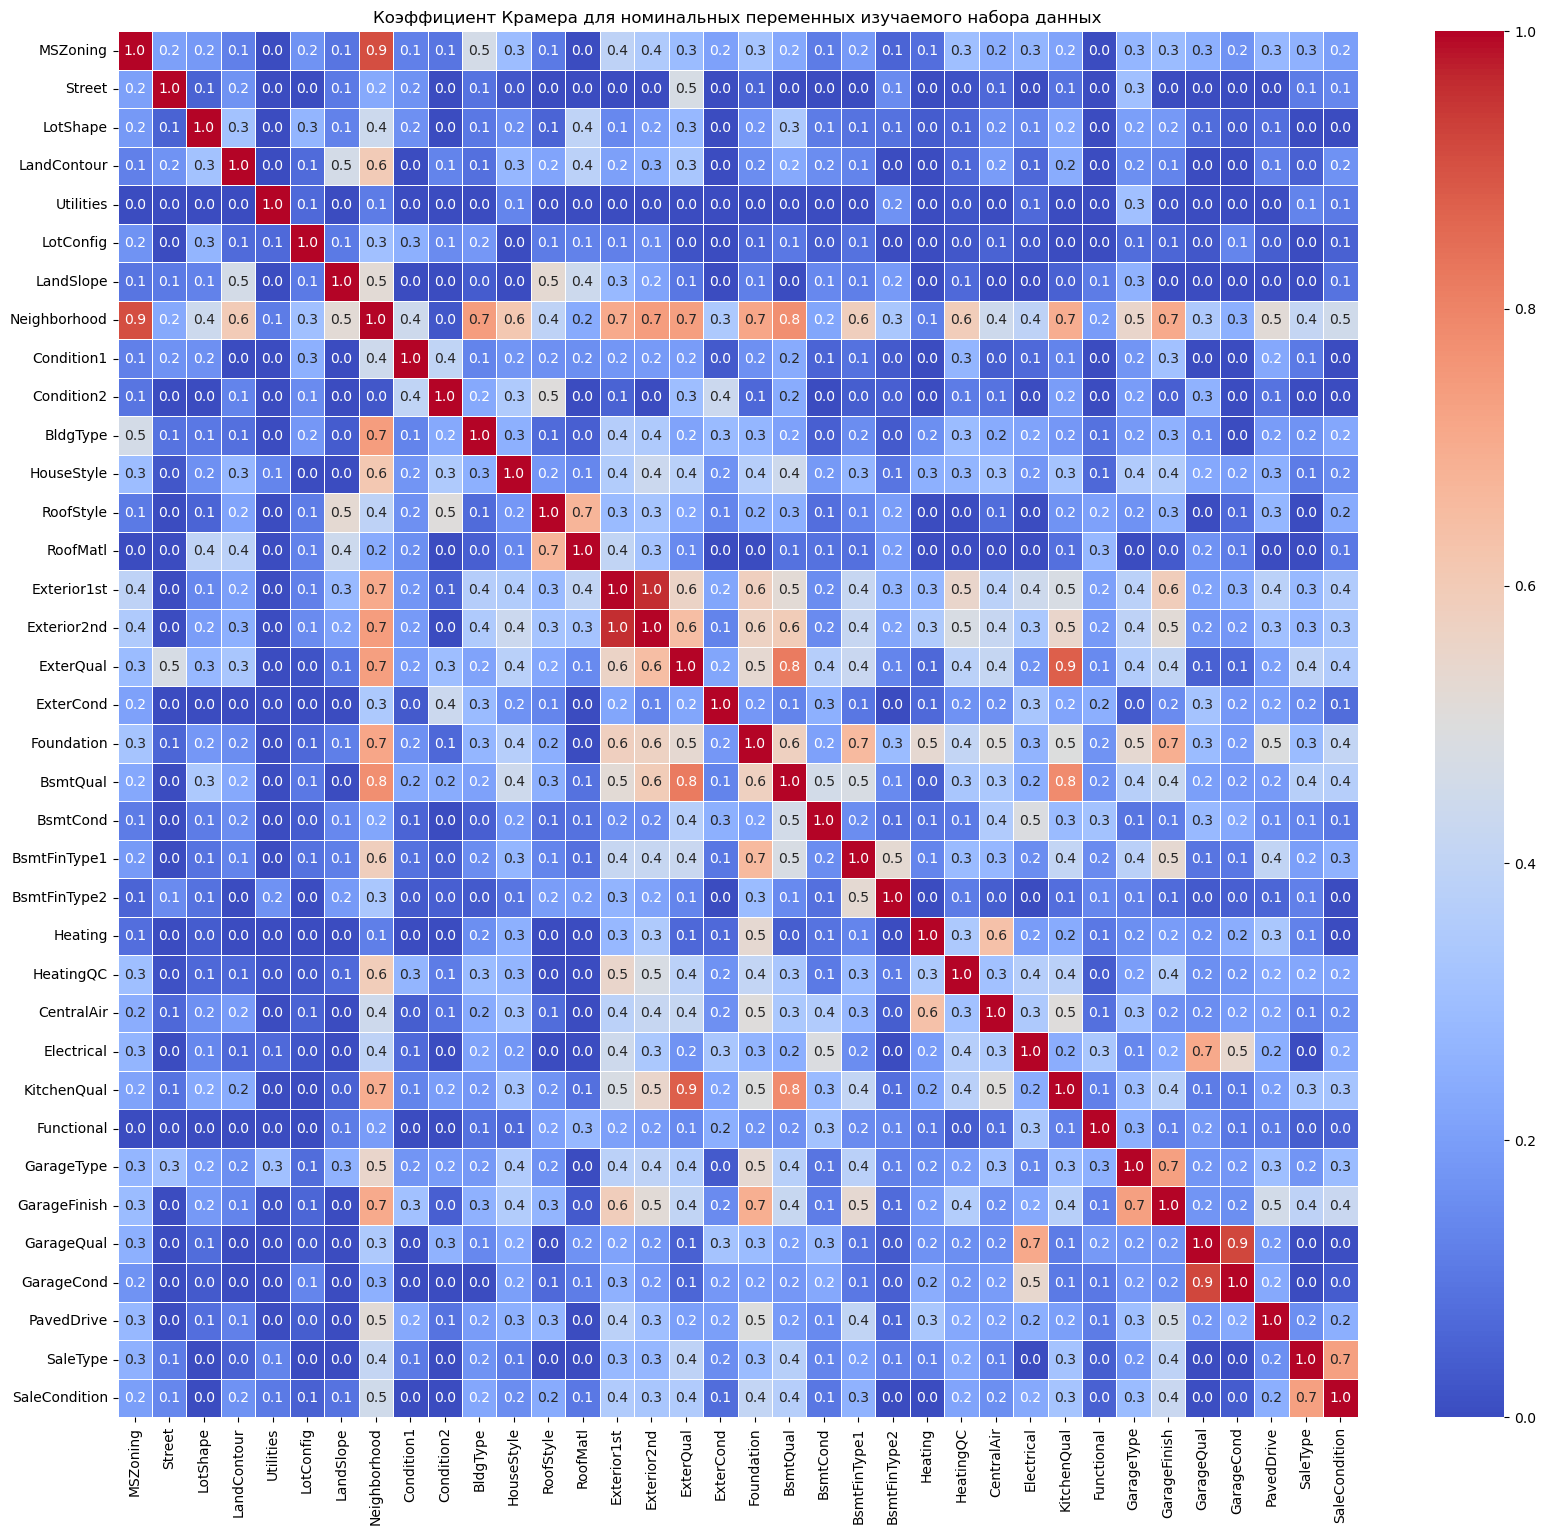

In [35]:
#### Для анализа взаимосвязей между нечисловыми переменными лучше подходит Коэффициент Крамера V 

# Выбор только номинальных переменных
qualitative_vars = df.select_dtypes(include=['object'])

# Calculate the phi coefficient matrix
cramers_v_matrix = qualitative_vars.phik_matrix()

# Plot the phi coefficient heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Коэффициент Крамера для номинальных переменных изучаемого набора данных')
plt.show()


5. Выполните проектирование признаков путем реализации следующих преобразований:
a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.

In [37]:
### Применяем one-hot encoding для переменной GarageType (расположение гаража) для того, чтобы затем создать переменную о наличии или отсутствии гаража
one_hot_encoded_df = pd.get_dummies(df, columns=['GarageType'])
one_hot_encoded_df ####  появились новые столбцы - тип расположения гаража с булевыми переменными 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,0,1,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,0,1,0,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,0,1,0,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,0,1,0,0,0,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,210000,0,1,0,0,0,0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,266500,0,1,0,0,0,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,142125,0,1,0,0,0,0


In [38]:
### label encoding присваивает ранги перекодированным значениям исходной переменной по алфавиту, поэтому я выбрал задание рангов для переменной GarageQual (качество гаража) следующим образом:

label_ranks = {
    'Ex': 1,  ### отличное качество
    'Gd': 2,  ### хорошее качество
    'TA': 3,  ### среднее качество
    'Fa': 4,  ### удовлетворительное качество
    'Po': 5}  ### плохое качество

one_hot_encoded_df['encoded_GarageQual'] = one_hot_encoded_df['GarageQual'].map(label_ranks)

In [39]:
#### Проверка результатов перекодирования

selected_columns = ['GarageQual', 'encoded_GarageQual']

unique_df = one_hot_encoded_df[['GarageQual', 'encoded_GarageQual']].drop_duplicates()

print(unique_df)

    GarageQual  encoded_GarageQual
0           TA                   3
8           Fa                   4
9           Gd                   2
185         Ex                   1
246         Po                   5


b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [40]:
#### Объединяем поля с типами расположения гаража в новую переменную (Garage), характеризующую, в принципе, наличие гаража.
#### Объединение булевых переменных на сновании логического ИЛИ. 

selected_columns = ['GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd']

# Merge selected columns based on logical "OR" operation
one_hot_encoded_df["Garage"] = one_hot_encoded_df[selected_columns].any(axis=1)

one_hot_encoded_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,encoded_GarageQual,Garage
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,Normal,208500,0,1,0,0,0,0,3,True
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,Normal,181500,0,1,0,0,0,0,3,True
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,Normal,223500,0,1,0,0,0,0,3,True
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,Abnorml,140000,0,0,0,0,0,1,3,True
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,Normal,250000,0,1,0,0,0,0,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,Normal,175000,0,1,0,0,0,0,3,True
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,Normal,210000,0,1,0,0,0,0,3,True
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,Normal,266500,0,1,0,0,0,0,3,True
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,Normal,142125,0,1,0,0,0,0,3,True


6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [41]:
one_hot_encoded_df.to_csv('cleaned_house_prices.csv', index=False)